In [1]:
import gym
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
env=gym.make('Taxi-v3')

In [82]:
num_episodes = 10

for episode in range (num_episodes):
    state_0 = env.reset()
    done = False # When true => the agent lost (the end of an episode)
    score = 0
    num_states_in_episode = 0 
    while not done:
        env.render() # To show how the agent interact with the env
        action = env.action_space.sample() # take a random action
        #returns the observations ensued from the agent-env interaction
        state, reward, done, info = env.step(action)
        score += reward
        clear_output(wait=True)
    print(f"Episode: {episode}, Score: {score}")
env.close()

In [2]:
# Creating a Q-table where rows are states and columns are actions
actions = env.action_space.n
# Note that for other environments where states are infint (e.g. state is an array of pixels) the 
# number of states is not avialable rather you can get the shape of the state
states = env.observation_space.n
print(actions, states)

6 500


In [3]:
q_tabel = np.zeros((states, actions))
rewards_episodes = []

In [4]:
# Q-learning parameteres
n_episodes = 10000
max_steps_per_episode = np.inf # Till the agent loss
gamma = 0.99
lr_rate = 0.1

### Annealing Policy (Simulated Annealing for RL)
#### Annealing policy computes a current threshold ($\epsilon$) to be used in a given inner policy such as Epsilon Greedy policy #### where $\epsilon$ decreases over time (episode) to shift the agent from more exploration to more exploitation.

#### Some cooling rules:
1. Exponential Annealing
2. Linear Annealing

In [138]:
# Parameters
intial_rate = 1 
max_rate = 1
min_rate = 0.01
decay_rate = 0.001

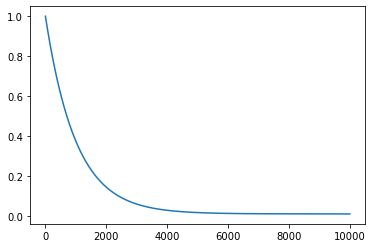

In [151]:
# Exponential Aneealing
exploration_rate = lambda episode: min_rate + (max_rate - min_rate)* np.exp(-decay_rate*episode)
episodes = np.arange(1,10000)
exploration_rates = [exploration_rate(eps) for eps in episodes]
plt.plot(episodes, exploration_rates)

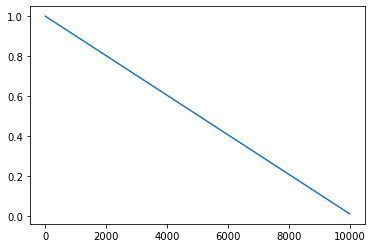

In [154]:
#  Linear Annealing f(x) = ax + b
nb_episodes = 10000
a = -(max_rate - min_rate)/nb_episodes
b = max_rate
exploration_rate = lambda episode: max(min_rate, a * episode + b)
exploration_rates = [exploration_rate(eps) for eps in episodes]
plt.plot(episodes, exploration_rates)

In [5]:
# Q-learning algorithm
exploration_rate = 1 
max_rate = 1
min_rate = 0.01
decay_rate = 0.001

for episode in range(n_episodes):
    state = env.reset() # Initial state
    done = False
    current_reward = 0
    
    while not done:
        x = float(np.random.uniform(0,1))
        if x > exploration_rate:
            # Take the greedy action
            action = np.argmax(q_tabel[state,:])
        else:
            # Explore
            action = env.action_space.sample()
            
        # Take action
        next_state, reward, done, info = env.step(action)
        # Update
        q_value = float(q_tabel[state, action])
        max_q_prime = np.max(q_tabel[next_state,:])
        TD_error = float(reward + gamma * max_q_prime - q_value)
        q_tabel[state, action] = float(q_value + (lr_rate * TD_error))
        
        state = next_state
        current_reward += reward
    
    # Exploration rate using Exp Annealing
    exploration_rate = min_rate + (max_rate - min_rate)* \
                        np.exp(-decay_rate*episode)
    rewards_episodes.append(current_reward)
print("****** Training Finished ******")

****** Training Finished ******


***** Average rewards per 1000 episodes *****
1000  :  -356.875
2000  :  -16.844
3000  :  2.542
4000  :  5.919
5000  :  6.862
6000  :  7.366
7000  :  7.579
8000  :  7.468
9000  :  7.419
10000  :  7.267


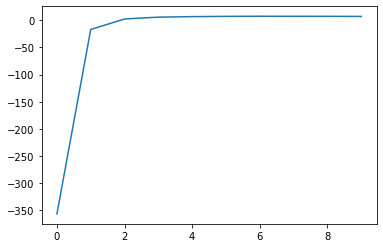

In [25]:
# Results interpritation
rewards_per_1000_eps = [np.average(r) for r in 
                        np.split(np.array(rewards_episodes), n_episodes/1000)]
print("***** Average rewards per 1000 episodes *****")
count = 1000
for r in rewards_per_1000_eps:
    print(count, ' : ', r)
    count += 1000
    
plt.plot(rewards_per_1000_eps)

In [19]:

count

range(1000, 10000, 1000)